# Read the table

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse


In [ ]:

from google.colab import drive
drive.mount('/content/drive')
main_directory = '/content/drive/MyDrive/My_Colab_Notebook/Soft Computing/Movie Recommendation System using Matrix Factorization/small_samples.csv'

df = pd.read_csv(main_directory, dtype = 'Int64')
df.columns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Index(['Unnamed: 0', 'Index', '0', '314', '628', '942', '1256', '1570', '1884',
       '2198', '2512', '2826', '3140', '3454', '3768', '4082', '4396', '4710'],
      dtype='object')

In [ ]:
df = df.drop(df[['Unnamed: 0']], axis=1)
df

,Index,0,314,628,942,1256,1570,1884,2198,2512,2826,3140,3454,3768,4082,4396,4710
0,26062,10,<NA>,3,8,5,4,0,<NA>,<NA>,10,<NA>,<NA>,2,1,3,<NA>
1,3768,7,1,1,3,<NA>,<NA>,<NA>,3,<NA>,<NA>,7,<NA>,<NA>,8,3,7
2,42704,2,4,4,10,9,8,<NA>,3,<NA>,1,8,4,9,10,<NA>,7
3,2826,0,<NA>,4,8,4,7,9,<NA>,2,1,8,<NA>,9,9,<NA>,2
4,22922,<NA>,1,3,2,<NA>,<NA>,<NA>,10,<NA>,6,1,10,10,1,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,12874,<NA>,<NA>,9,<NA>,6,<NA>,<NA>,8,8,4,<NA>,8,10,8,6,6
142,48984,6,<NA>,4,6,2,<NA>,<NA>,8,8,10,7,3,<NA>,<NA>,<NA>,<NA>
143,11304,8,<NA>,<NA>,9,1,5,0,0,<NA>,<NA>,8,<NA>,10,2,<NA>,1
144,10676,10,<NA>,9,<NA>,6,5,<NA>,4,0,10,8,<NA>,6,9,10,5


In [ ]:
# my_index=314
# df1 = df[ df['Index'] % my_index == 0 ]


# selected=[str(i) for i in range(5000) if(i % my_index != 0)]
    
# print(selected)
# df1 = df1.drop(selected, axis=1)
# df1.to_csv("small_samples.csv")

In [ ]:
df1=df.replace(np.nan, 0)
df1

,Index,0,314,628,942,1256,1570,1884,2198,2512,2826,3140,3454,3768,4082,4396,4710
0,26062,10,0,3,8,5,4,0,0,0,10,0,0,2,1,3,0
1,3768,7,1,1,3,0,0,0,3,0,0,7,0,0,8,3,7
2,42704,2,4,4,10,9,8,0,3,0,1,8,4,9,10,0,7
3,2826,0,0,4,8,4,7,9,0,2,1,8,0,9,9,0,2
4,22922,0,1,3,2,0,0,0,10,0,6,1,10,10,1,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,12874,0,0,9,0,6,0,0,8,8,4,0,8,10,8,6,6
142,48984,6,0,4,6,2,0,0,8,8,10,7,3,0,0,0,0
143,11304,8,0,0,9,1,5,0,0,0,0,8,0,10,2,0,1
144,10676,10,0,9,0,6,5,0,4,0,10,8,0,6,9,10,5


In [ ]:
items=df1.columns.to_list()
items.pop(0)
items

['0',
 '314',
 '628',
 '942',
 '1256',
 '1570',
 '1884',
 '2198',
 '2512',
 '2826',
 '3140',
 '3454',
 '3768',
 '4082',
 '4396',
 '4710']

## creating numpy array from the main dataframe 


In [ ]:
uids=df1['Index']
df2 = df1.drop(df1[['Index']], axis=1)
rating_matrix=df2.to_numpy(dtype='float', na_value=0)
print(rating_matrix)

print(uids.to_list())

[[10.  0.  3. ...  1.  3.  0.]
 [ 7.  1.  1. ...  8.  3.  7.]
 [ 2.  4.  4. ... 10.  0.  7.]
 ...
 [ 8.  0.  0. ...  2.  0.  1.]
 [10.  0.  9. ...  9. 10.  5.]
 [ 0.  9.  0. ...  5.  0.  8.]]
[26062, 3768, 42704, 2826, 22922, 21038, 41762, 7850, 39250, 1884, 16642, 27946, 34854, 42076, 27004, 32342, 30144, 4710, 30458, 2198, 10990, 31400, 47100, 11618, 17584, 12560, 5652, 32028, 6594, 16328, 7536, 48042, 19154, 11932, 24492, 3454, 37366, 29202, 10048, 49298, 27632, 942, 18526, 32656, 21980, 31714, 48670, 9106, 49612, 314, 9420, 36424, 23550, 41448, 28574, 45216, 36738, 32970, 24178, 20410, 38936, 18840, 41134, 40506, 0, 14758, 23236, 34540, 35482, 2512, 13188, 44902, 27318, 26690, 10362, 7222, 36110, 21666, 6908, 6280, 16956, 37680, 46786, 3140, 4082, 16014, 20096, 35796, 34226, 5024, 30772, 29830, 9734, 12246, 33912, 18212, 40820, 22608, 15072, 23864, 31086, 47414, 39564, 37052, 22294, 35168, 40192, 4396, 14444, 17270, 5338, 44274, 43960, 48356, 45530, 1256, 43332, 24806, 43646, 33284

In [ ]:
# compute the non-zero elements in the rating matrix
matrix_size = np.prod(rating_matrix.shape)
interaction = np.flatnonzero(rating_matrix).shape[0]
sparsity = 100 * (interaction / matrix_size)

print('dimension: ', rating_matrix.shape)
print('sparsity: {:.1f}%'.format(sparsity))
rating_matrix

dimension:  (146, 16)
sparsity: 56.8%


array([[10.,  0.,  3., ...,  1.,  3.,  0.],
       [ 7.,  1.,  1., ...,  8.,  3.,  7.],
       [ 2.,  4.,  4., ..., 10.,  0.,  7.],
       ...,
       [ 8.,  0.,  0., ...,  2.,  0.,  1.],
       [10.,  0.,  9., ...,  9., 10.,  5.],
       [ 0.,  9.,  0., ...,  5.,  0.,  8.]])

## Spliting into training and test sets.
Remove 10 ratings from each user and assign them to the test set
  

In [ ]:
def create_train_test(ratings):
    test = np.zeros(ratings.shape)
    train = ratings.copy()
    for user in range(ratings.shape[0]):
        test_index = np.random.choice(np.flatnonzero(ratings[user]), size = 10)
        train[user, test_index] = 0.0
        test[user, test_index] = ratings[user, test_index]
        
    # assert that training and testing set are truly disjoint
    assert np.all(train * test == 0)
    return train, test

train, test = create_train_test(rating_matrix)

print("Test data: ")
print(test.shape)
print(test)
print("Train Data: ")
print(train.shape)
print(train)


Test data: 
(146, 16)
[[ 0.  0.  3. ...  0.  3.  0.]
 [ 7.  1.  1. ...  8.  0.  7.]
 [ 2.  4.  4. ... 10.  0.  0.]
 ...
 [ 8.  0.  0. ...  2.  0.  1.]
 [10.  0.  9. ...  9. 10.  0.]
 [ 0.  9.  0. ...  5.  0.  8.]]
Train Data: 
(146, 16)
[[10.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ...  0.  3.  0.]
 [ 0.  0.  0. ...  0.  0.  7.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  5.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [ ]:
class MatrixFactorization:
    def __init__(self, n_iters, n_factors,my_index):
        self.initLambda(my_index)
        self.n_iters = n_iters
        self.n_factors = n_factors  
        
    def initLambda(self,my_index):
        self.lambda_u = (0.00015 + 0.0001 * (my_index % 8))
        self.lambda_v = (0.00025 - 0.0001 * (my_index % 7))
        #print(lambda_u,lambda_v)
    
    def fit(self, train, test):
        """
        pass in training and testing at the same time to record
        model convergence, assuming both dataset is in the form
        of User x Item matrix with cells as ratings
        """
        self.n_user, self.n_item = train.shape
        self.user_factors = np.random.random((self.n_user, self.n_factors))
        self.item_factors = np.random.random((self.n_item, self.n_factors))
        
        #normalize
        umax, umin = self.user_factors.max(), self.user_factors.min()
        self.user_factors = (self.user_factors - umin)/(umax - umin) * 10
        vmax, vmin = self.item_factors.max(), self.item_factors.min()
        self.item_factors = (self.item_factors - vmin)/(vmax - vmin) * 10
        
        # record the training and testing mean squared error(MSE) for every iteration
        # to show convergence later (usually, not worth it for production)
        self.test_mse_record  = []
        self.train_mse_record = []   
        for _ in range(self.n_iters):
            self.user_factors = self._als_step(train, self.user_factors, self.item_factors,self.lambda_u)   
            self.item_factors = self._als_step(train.T, self.item_factors, self.user_factors,self.lambda_v) 
            predictions = self.predict()
            test_mse = self.compute_mse(test, predictions)
            train_mse = self.compute_mse(train, predictions)
            self.test_mse_record.append(test_mse)
            self.train_mse_record.append(train_mse)
        
        return self    
    
    def _als_step(self, ratings, solve_vecs, fixed_vecs,reg):
        """
        when updating the user matrix,
        the item matrix is the fixed vector and vice versa
        """
        A = fixed_vecs.T.dot(fixed_vecs) + np.eye(self.n_factors) * reg
        b = ratings.dot(fixed_vecs)
        A_inv = np.linalg.inv(A)
        solve_vecs = b.dot(A_inv)
        return solve_vecs
    
    def predict(self):
        """predict ratings for every user and item"""
        pred = self.user_factors.dot(self.item_factors.T)
        return pred
    
    @staticmethod
    def compute_mse(y_true, y_pred):
        """ignore zero terms prior to comparing the mse"""
        mask = np.nonzero(y_true)
        mse = mean_squared_error(y_true[mask], y_pred[mask])
        return mse

In [ ]:


def plot_learning_curve(figure,axes,num,model,latent_factor,iteration):
    """visualize the training/testing loss"""
    linewidth = 3
    axes[num].plot(model.test_mse_record, label = 'Test', linewidth = linewidth)
    axes[num].plot(model.train_mse_record, label = 'Train', linewidth = linewidth)
    #axes[num].xlabel('iterations')
    #axes[num].ylabel('MSE')
    axes[num].set_title("K = "+str(latent_factor)+" Iteration = "+str(iteration))
    axes[num].legend(loc = 'best') 
    

## Hyper parameter tuning(GridSearchCV)

New optimal hyperparameters
n_factors                                                    2
n_iter                                                     800
train_mse                                              21.5179
test_mse                                               29.9874
model        <__main__.MatrixFactorization object at 0x7fe2...
dtype: object
New optimal hyperparameters
n_factors                                                    4
n_iter                                                    3000
train_mse                                              12.5149
test_mse                                               23.9161
model        <__main__.MatrixFactorization object at 0x7fe2...
dtype: object
New optimal hyperparameters
n_factors                                                    5
n_iter                                                    3000
train_mse                                              8.66741
test_mse                                               21.0394
model 

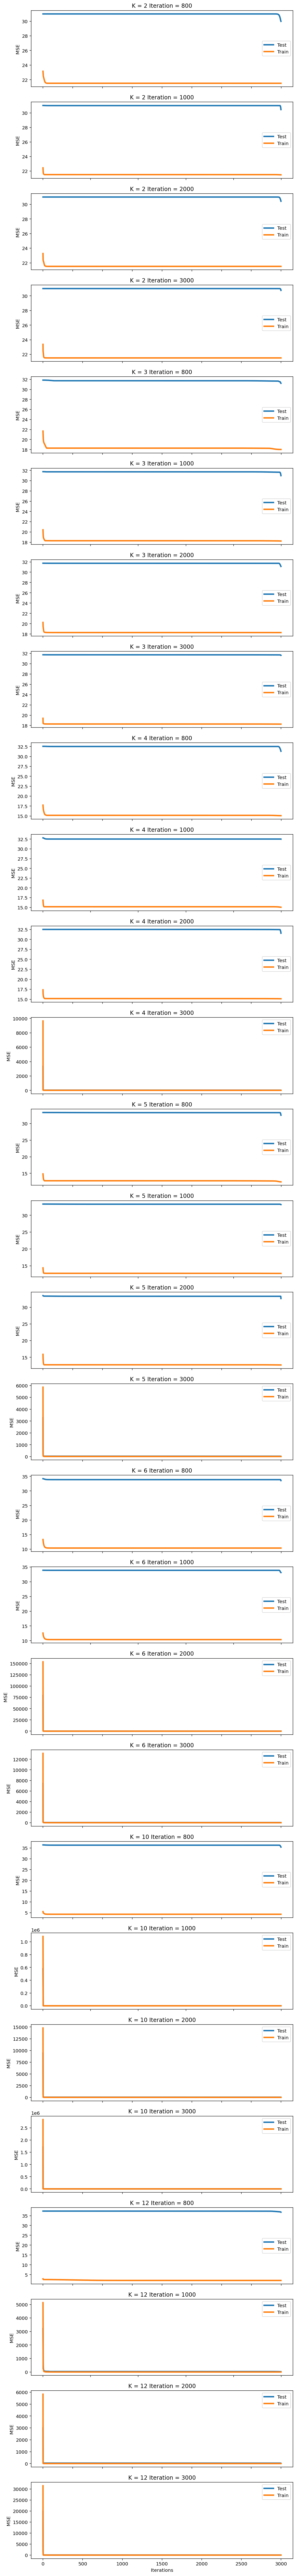

In [ ]:

iterations=[800,1000,2000,3000]
K=[2,3,4,5,6,10,12]

figure, axes = plt.subplots(len(iterations)*len(K))
figure.set_size_inches(w=10,h=100)

best_params = {}
best_params['n_factors'] = K[0]
best_params['n_iter'] = 0
best_params['train_mse'] = np.inf
best_params['test_mse'] = np.inf
best_params['model'] = None

num=0
for latent_factor in K:
  for iteration in iterations:
      als = MatrixFactorization(n_iters = iteration, n_factors = latent_factor, my_index=314)
      als.fit(train, test)
      plot_learning_curve(figure,axes,num,als,latent_factor,iteration)
      num+=1
      min_idx = np.argmin(als.test_mse_record)
      if als.test_mse_record[min_idx] < best_params['test_mse']:
            best_params['n_factors'] = latent_factor
            best_params['n_iter'] = iteration
            best_params['train_mse'] = als.train_mse_record[min_idx]
            best_params['test_mse'] = als.test_mse_record[min_idx]
            best_params['model'] = als
            print('New optimal hyperparameters')
            print(pd.Series(best_params))

for ax in axes.flat:
    ax.set(xlabel='Iterations', ylabel='MSE')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()

## For cosine similarity:
1) https://stackoverflow.com/questions/17627219/whats-the-fastest-way-in-python-to-calculate-cosine-similarity-given-sparse-mat

2) https://medium.com/@bkexcel2014/building-movie-recommender-systems-using-cosine-similarity-in-python-eff2d4e60d24


In [ ]:
def calc_cosine_similarities(mat):
      mat=sparse.csr_matrix(mat)
      similarities = cosine_similarity(mat) 
      return similarities

In [ ]:
print("Cosine similarities between all pairs of users: ")
user_cosine_mat=calc_cosine_similarities(best_params['model'].user_factors)

user_cosine_mat_df = pd.DataFrame(user_cosine_mat, columns =uids.to_list(),index=uids.to_list()  )
user_cosine_mat_df


In [ ]:
print("Cosine similarities between all pairs of movies: ")
movie_cos_mat = calc_cosine_similarities(best_params['model'].item_factors)
user_cosine_mat_df = pd.DataFrame(movie_cos_mat, columns =items,index=items  )
user_cosine_mat_df

In [ ]:
rating_matrix_df = pd.DataFrame(rating_matrix, columns =items,index=uids.to_list()  )
rating_matrix_df


## Suggest 5 movies that user '26062' has not rated yet

In [ ]:
#selecting the movies of a particular user that is not yet rated by the user 
selected_uid=26062
d=rating_matrix_df.loc[selected_uid, rating_matrix_df.loc[selected_uid,:]==0 ]
d.index.to_list()

In [ ]:
pred=best_params['model'].predict()

pred_df=pd.DataFrame(pred, columns =items,index=uids.to_list()  )
pred_df

In [ ]:
d1=pred_df.loc[selected_uid, d.index.to_list() ]
mylist=list(zip(d1.index,d1.values))
mylist.pop(-1)
mylist.pop(-1)
print("MovieIds-------Rating of user "+str(selected_uid))
mylist